In [6]:
##Compilation du programme : 
!cmake  -G "MinGW Makefiles" ..\TP1-Archi
!cmake --build .
##ATTENTION REQUIERT LES PACKAGES DE MINGW, LA COMPILATION PAR VISUAL STUDIO NE FONCTIONNE PAS, SEULE LA MINGW FONCTIONNE

-- Configuring done (0.3s)
-- Generating done (0.0s)
-- Build files have been written to: C:/Users/guill/Documents/ISIMA/Archi/architecture-logicielle-tp1/Jupyter
[ 14%] Building CXX object CMakeFiles/TP1_Archi.dir/utils/FileWriter.cpp.obj
[ 28%] Linking CXX executable TP1_Archi.exe
[100%] Built target TP1_Archi


In [7]:
####Version DEPRECIEE : 
#!start TP1_Archi.exe
##ATTENDRE QUE LES 100 CSV SOIENT GENERES AVANT D'EXECUTER LES CELLULES SUIVANTES


##Version actuelle 
import subprocess

command = 'TP1_Archi.exe'

process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True, text=True)

stdout, stderr = process.communicate()

print(stdout)
if stderr:
    print("Sortie d'erreur du programme :")
    print(stderr)

File output/Simulation n 1.csv Created Successfully.
File output/Simulation n 2.csv Created Successfully.
File output/Simulation n 3.csv Created Successfully.
File output/Simulation n 4.csv Created Successfully.
File output/Simulation n 5.csv Created Successfully.
File output/Simulation n 6.csv Created Successfully.
File output/Simulation n 7.csv Created Successfully.
File output/Simulation n 8.csv Created Successfully.
File output/Simulation n 9.csv Created Successfully.
File output/Simulation n 10.csv Created Successfully.
File output/Simulation n 11.csv Created Successfully.
File output/Simulation n 12.csv Created Successfully.
File output/Simulation n 13.csv Created Successfully.
File output/Simulation n 14.csv Created Successfully.
File output/Simulation n 15.csv Created Successfully.
File output/Simulation n 16.csv Created Successfully.
File output/Simulation n 17.csv Created Successfully.
File output/Simulation n 18.csv Created Successfully.
File output/Simulation n 19.csv Creat

In [8]:
#Initialisation des valeurs

import csv
import matplotlib.pyplot as plt
import math

nb_individus = 20000
nb_fichiers = 100
nb_jours = 730

suceptible = [[0 for _ in range(nb_fichiers)] for _ in range(nb_jours)]
exposed = [[0 for _ in range(nb_fichiers)] for _ in range(nb_jours)]
infected = [[0 for _ in range(nb_fichiers)] for _ in range(nb_jours)]
recovered = [[0 for _ in range(nb_fichiers)] for _ in range(nb_jours)]

            
def Afficher(tab, nom):
    print(nom,":")
    for val in tab:
        print(val)

def normer(tab):
    for i in range(len(tab)):
        tab[i] = tab[i]/nb_individus
        

In [9]:
#Lecture des CSV
for i in range(nb_fichiers):
    fichier_csv = f"output/Simulation n {i+1}.csv"

    first_line = True
    with open(fichier_csv, 'r') as fichier:
        lecteur_csv = csv.reader(fichier, delimiter=';')
        for ligne in lecteur_csv:
            if(first_line):
                first_line = False
            elif len(ligne) >= 4:  
                suceptible[i].append(float(ligne[0]))
                exposed[i].append(float(ligne[1]))
                infected[i].append(float(ligne[2]))
                recovered[i].append(float(ligne[3]))


In [10]:
#Normer les tableaux de 0 à 1
for i in range(nb_fichiers):
    normer(suceptible[i])
    normer(exposed[i])
    normer(infected[i])
    normer(recovered[i])

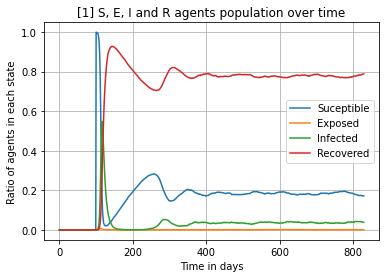

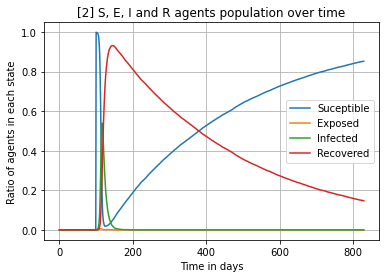

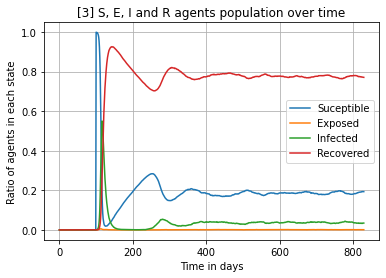

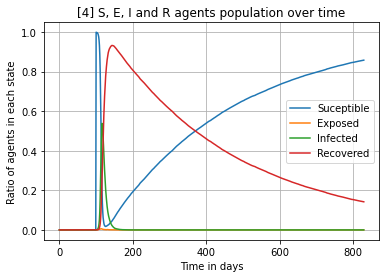

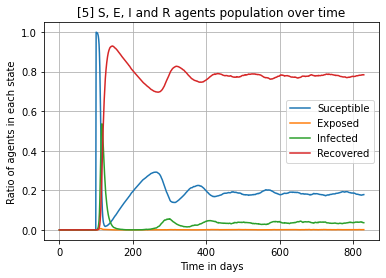

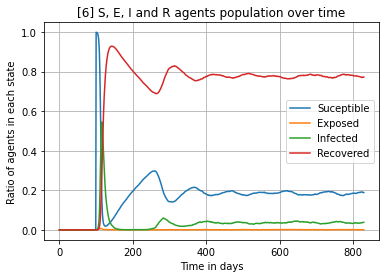

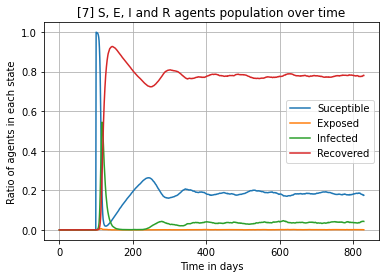

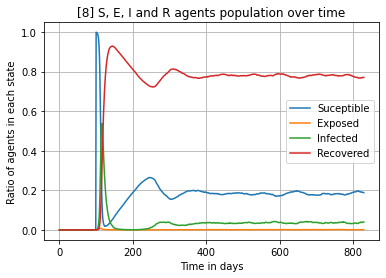

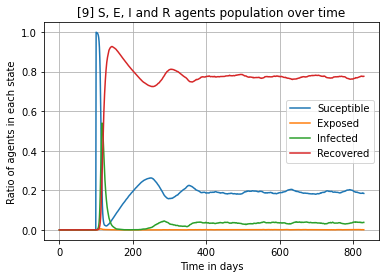

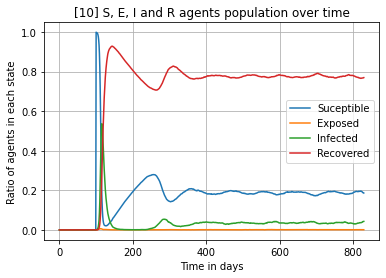

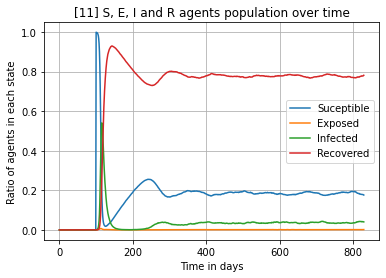

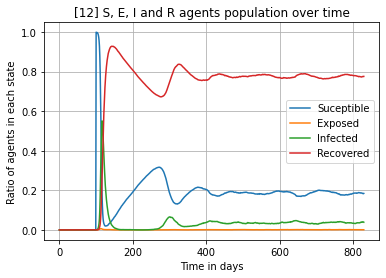

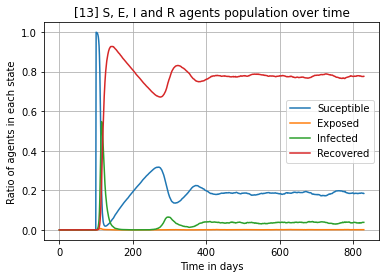

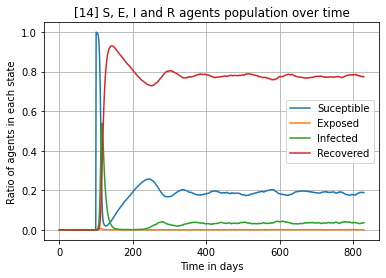

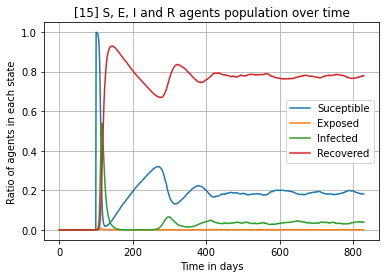

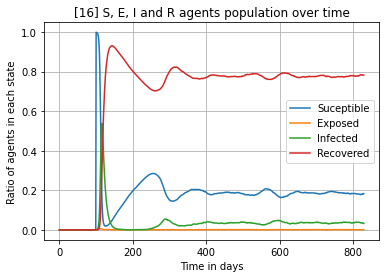

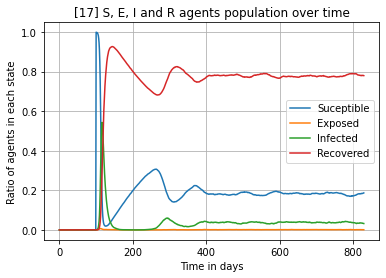

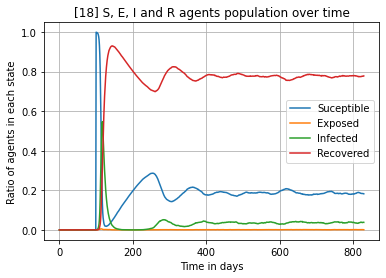

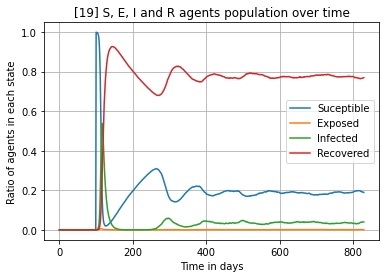

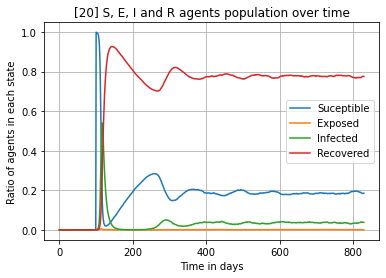

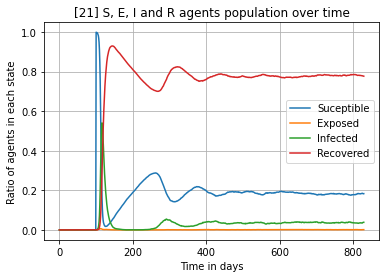

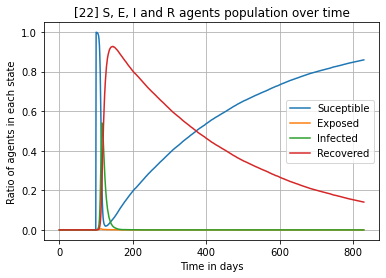

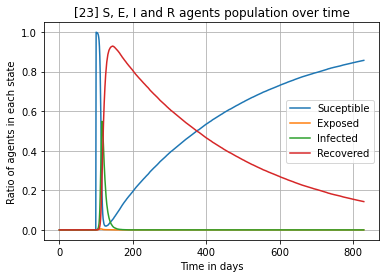

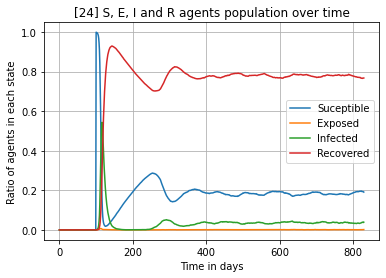

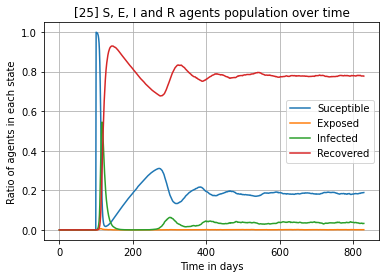

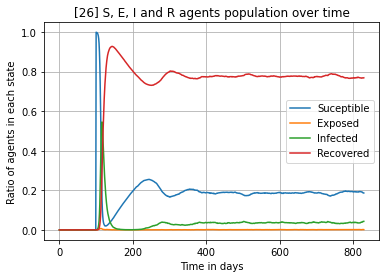

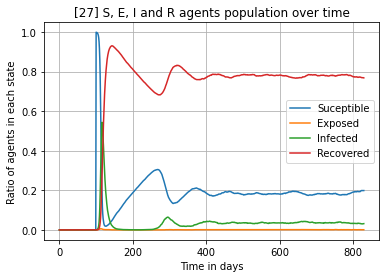

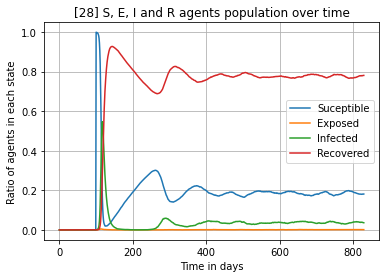

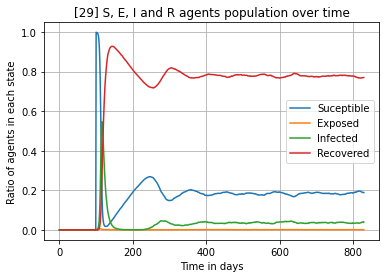

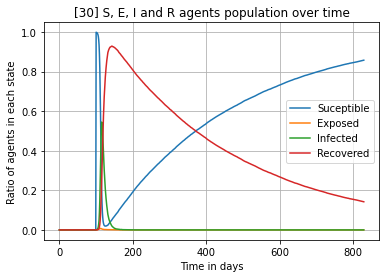

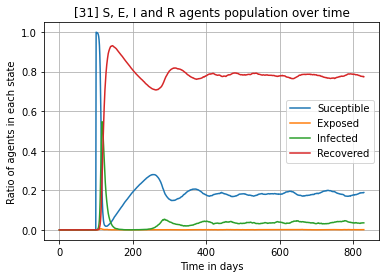

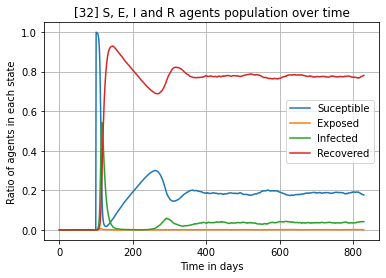

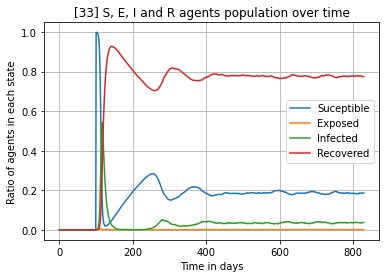

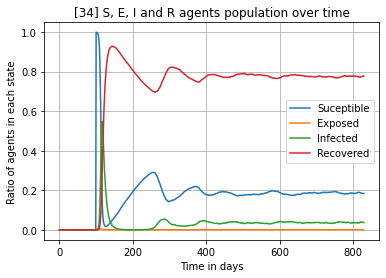

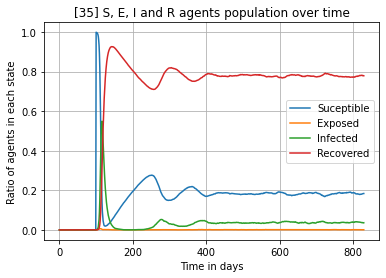

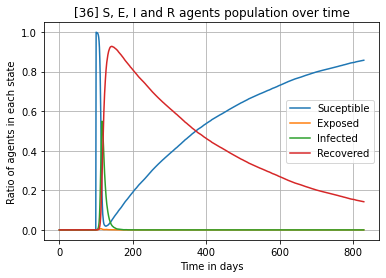

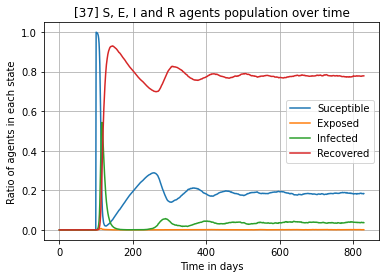

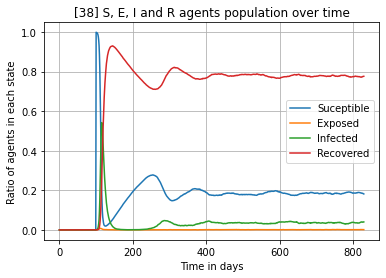

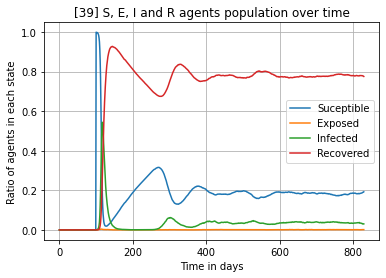

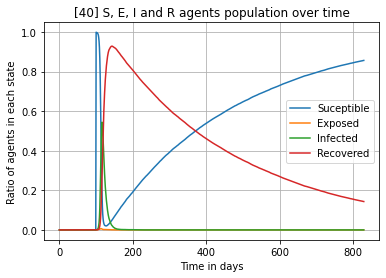

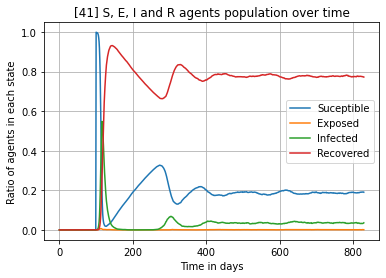

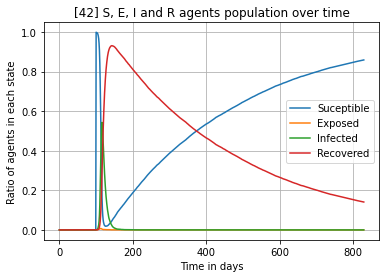

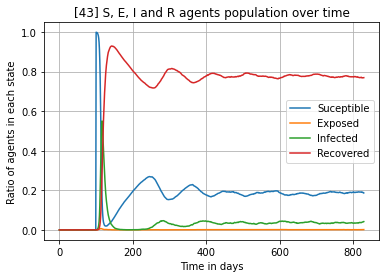

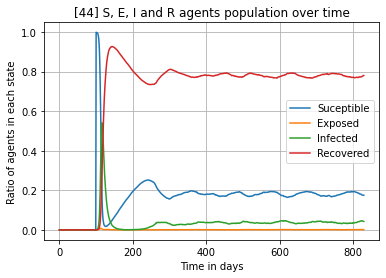

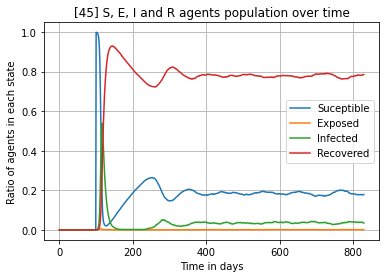

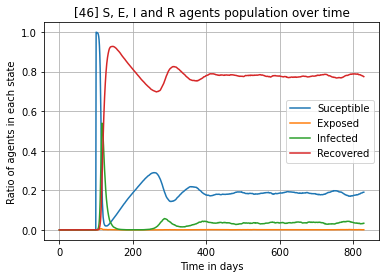

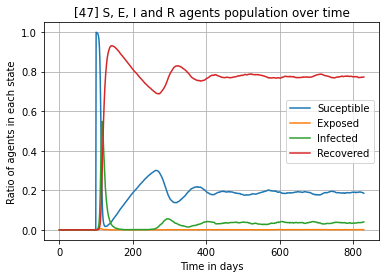

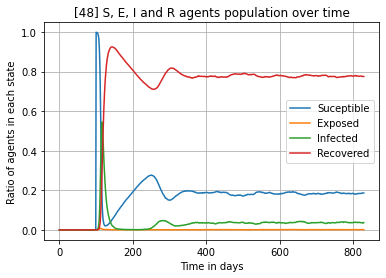

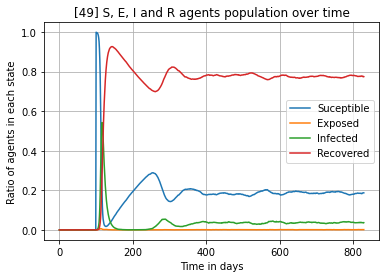

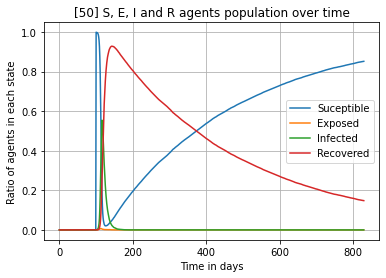

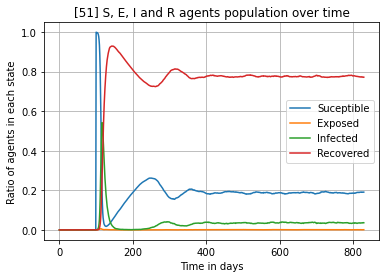

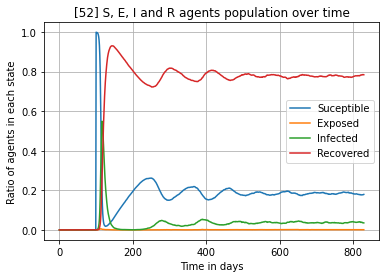

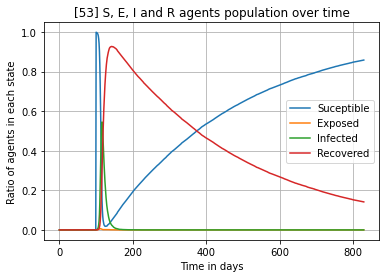

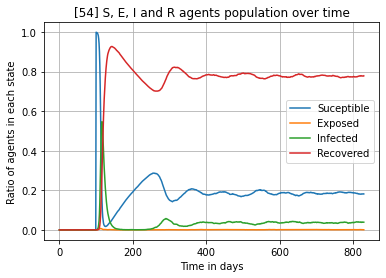

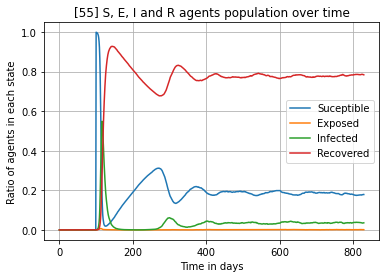

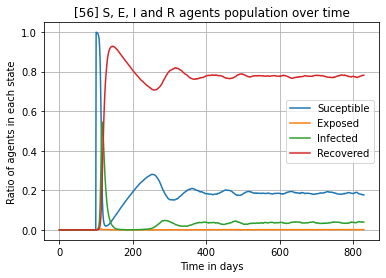

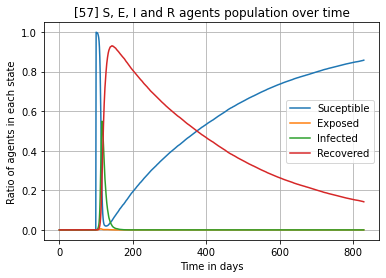

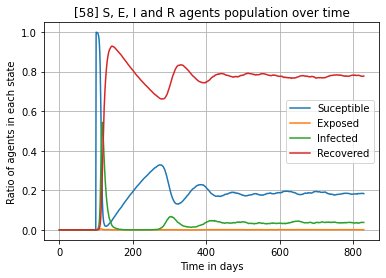

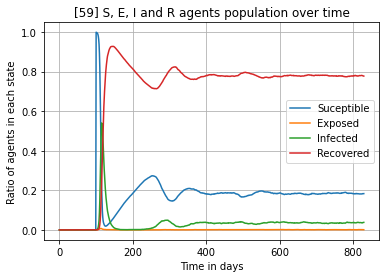

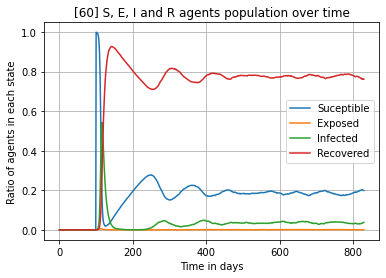

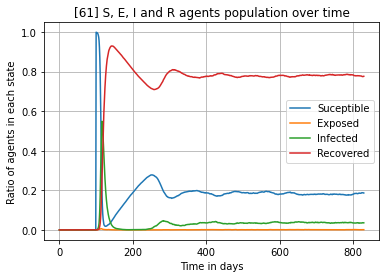

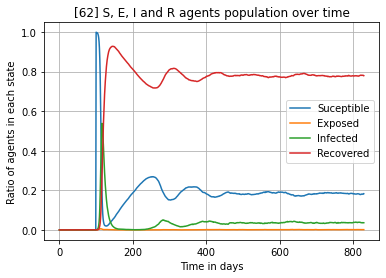

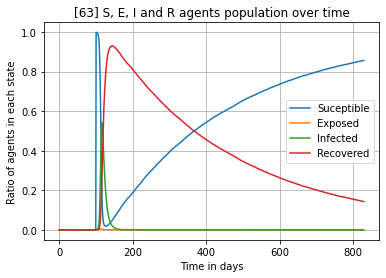

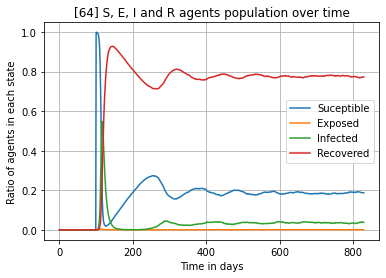

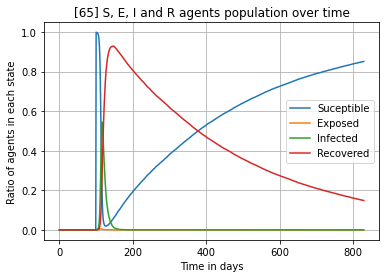

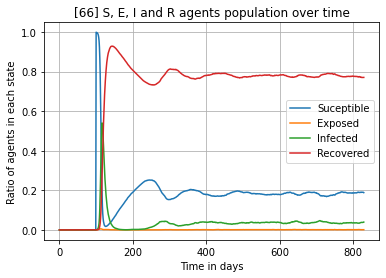

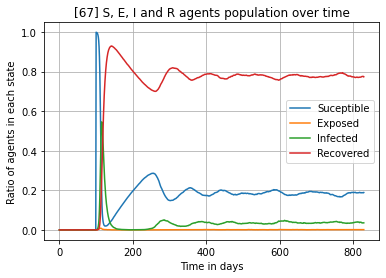

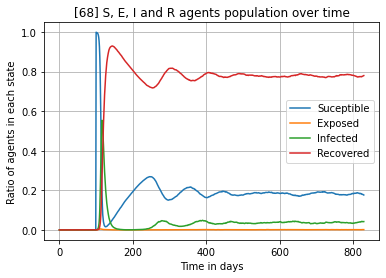

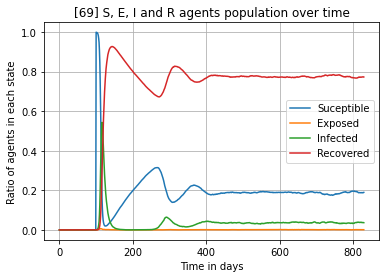

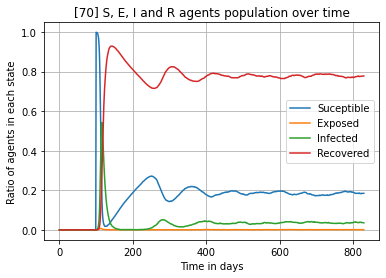

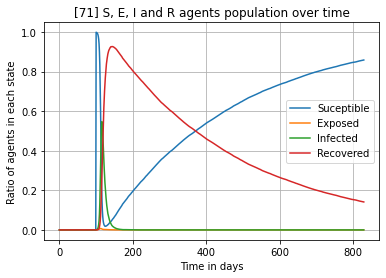

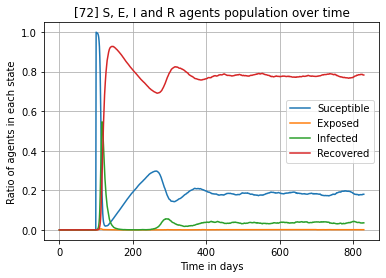

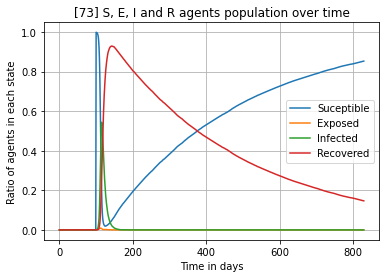

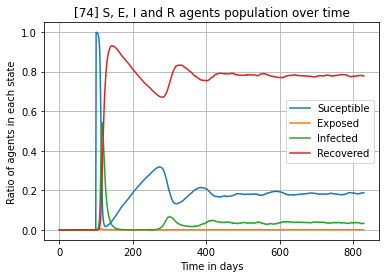

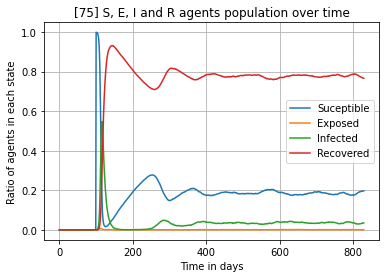

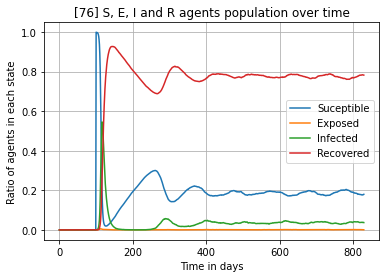

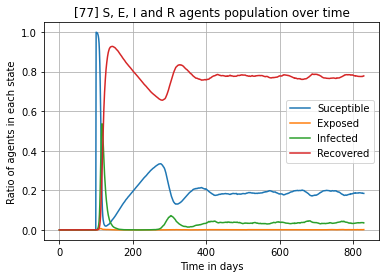

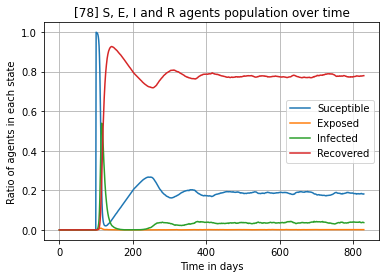

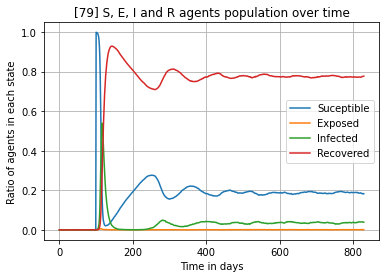

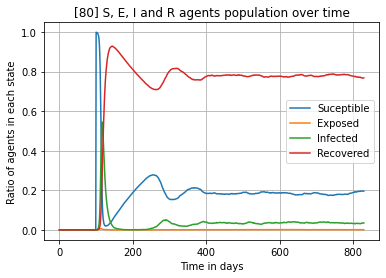

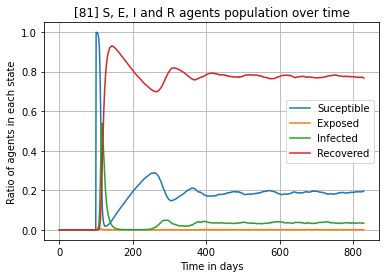

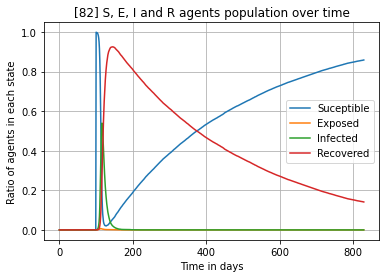

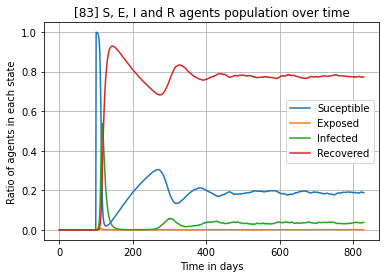

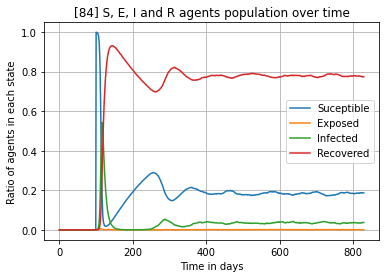

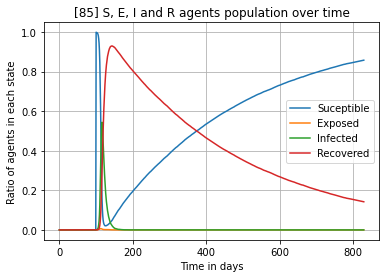

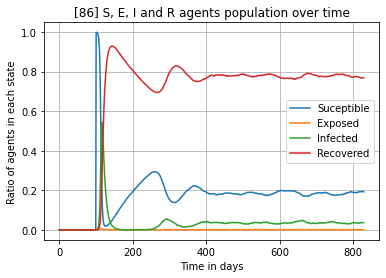

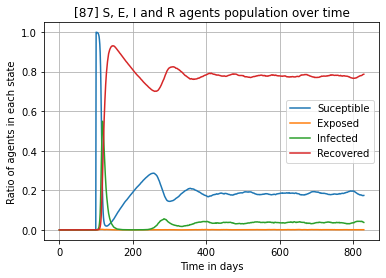

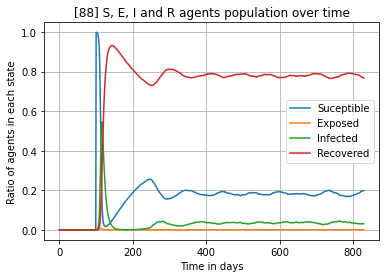

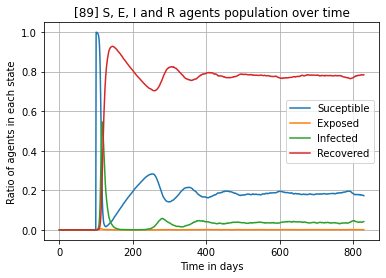

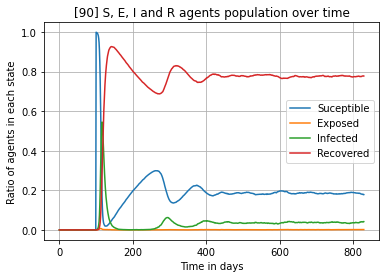

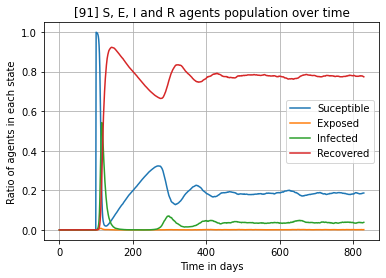

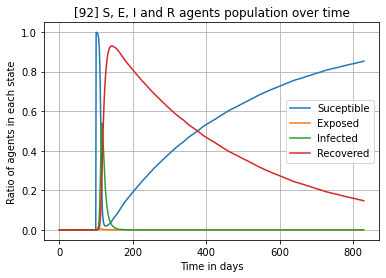

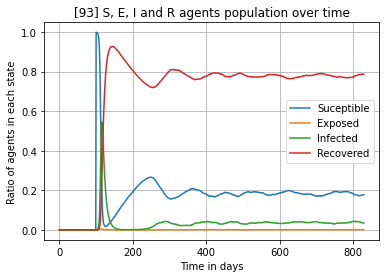

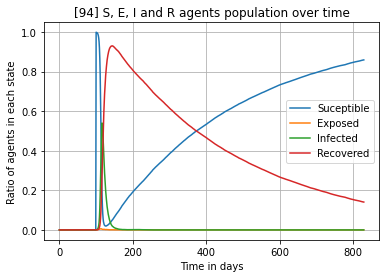

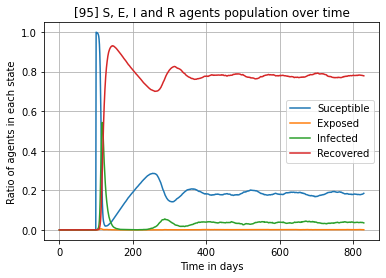

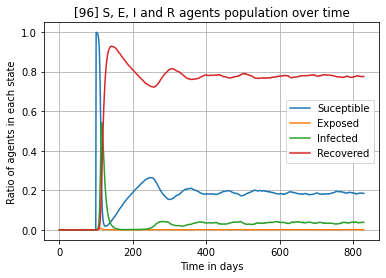

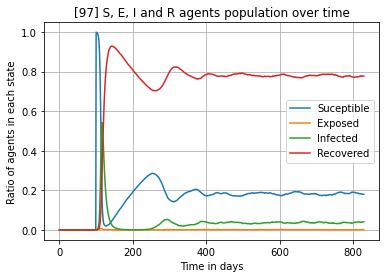

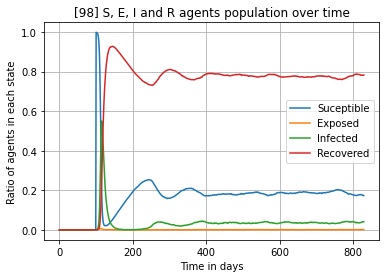

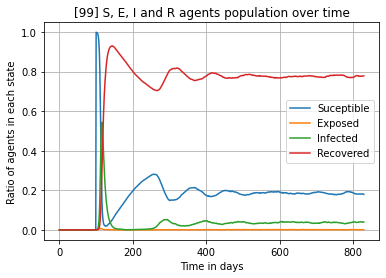

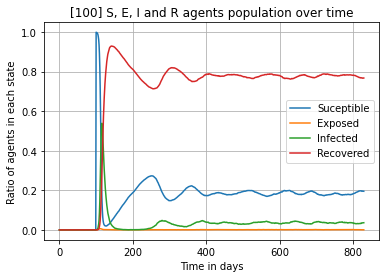

In [11]:
#Affichage des courbes

abscisses = [i for i in range(len(suceptible[0]))]

for i in range(nb_fichiers):
    plt.plot(abscisses, suceptible[i], label='Suceptible')
    plt.plot(abscisses, exposed[i], label='Exposed')
    plt.plot(abscisses, infected[i], label='Infected')
    plt.plot(abscisses, recovered[i], label='Recovered')

    plt.legend()
    plt.title(f"[{i+1}] S, E, I and R agents population over time")
    plt.xlabel('Time in days')
    plt.ylabel('Ratio of agents in each state')

    plt.grid(True)
    plt.show()


In [12]:
average_suceptible = [0] * nb_jours
average_exposed = [0] * nb_jours
average_infected = [0] * nb_jours
average_recovered = [0] * nb_jours



In [13]:

# Calculer les moyennes
for i in range(nb_fichiers):
    for j in range(nb_jours):
        average_suceptible[j] += suceptible[i][j]
        average_exposed[j] += exposed[i][j]
        average_infected[j] += infected[i][j]
        average_recovered[j] += recovered[i][j]

for i in range(nb_jours):
    average_suceptible[i] /= nb_fichiers
    average_exposed[i] /= nb_fichiers
    average_infected[i] /= nb_fichiers
    average_recovered[i] /= nb_fichiers
    
  

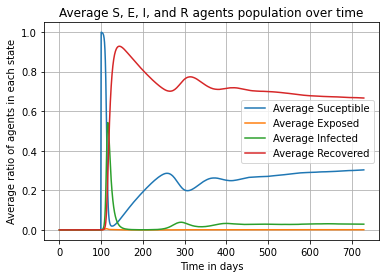

In [14]:
abscisses = [i for i in range(nb_jours)]
    
plt.plot(abscisses, average_suceptible, label='Average Suceptible')
plt.plot(abscisses, average_exposed, label='Average Exposed')
plt.plot(abscisses, average_infected, label='Average Infected')
plt.plot(abscisses, average_recovered, label='Average Recovered')


plt.legend()
plt.title('Average S, E, I, and R agents population over time')
plt.xlabel('Time in days')
plt.ylabel('Average ratio of agents in each state')

plt.grid(True)
plt.show()